In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re sizing all images
IMAGE_SIZE = [224, 224] # these are the dimensions of our pretained model

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [3]:
# Importing the Vgg 16 
model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# we will use transfer learning concept, so don't train existing weights
for layer in model.layers:
    layer.trainable = False

In [6]:
folders = glob('Dataset/Train/*') #this is the directory of our training dataset

- This dataset is only a fraction from the whole dataset available on kaggle website, the dataset is reduced to decrease the training time 

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
# outer layer is flattened
x = Flatten()(model.output)

In [9]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=model.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:

from tensorflow.keras.layers import MaxPooling2D

In [12]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [13]:
# will use adam as an optimizer, categorical_crossentropy for loass function and accuracy as metrics
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


- The above code is making the image data generator objects for train and test data

In [15]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:

training_set

In [17]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 33s 3s/step - loss: 1.1995 - accuracy: 0.5024 - val_loss: 0.6917 - val_accuracy: 0.5075
Epoch 2/50
13/13 [==============================] - 23s 2s/step - loss: 0.6276 - accuracy: 0.6707 - val_loss: 0.7374 - val_accuracy: 0.4627
Epoch 3/50
13/13 [==============================] - 26s 2s/step - loss: 0.5274 - accuracy: 0.7284 - val_loss: 0.9980 - val_accuracy: 0.4627
Epoch 4/50
13/13 [==============================] - 27s 2s/step - loss: 0.4600 - accuracy: 0.7740 - val_loss: 0.9887 - val_accuracy: 0.4030
Epoch 5/50
13/13 [==============================] - 26s 2s/step - loss: 0.3897 - accuracy: 0.8341 - val_loss: 1.0878 - val_accuracy: 0.4104
Epoch 6/50
13/13 [==============================] - 20s 2s/step - loss: 0.3731 - accuracy: 0.8341 - val_loss: 0.8698 - val_accuracy: 0.5448
Epoch 7/50
13/13 [==============================] - 21s 2s/step - loss: 0.3538 - acc

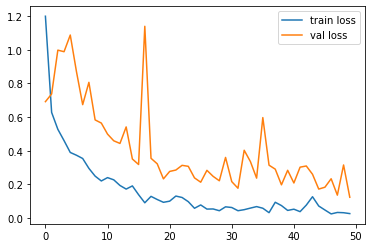

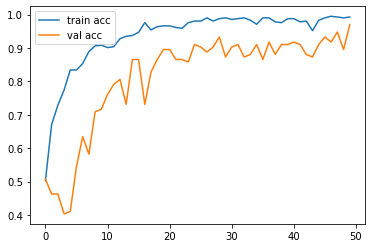

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

- validation accuracy seems to improve over these epochs, but there is some overfitting between the training

In [20]:
# will save the model in a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:

y_pred

array([[1.09594233e-01, 8.90405774e-01],
       [1.00000000e+00, 1.18584777e-11],
       [1.53802540e-02, 9.84619796e-01],
       [9.99998093e-01, 1.85455906e-06],
       [9.99776185e-01, 2.23767260e-04],
       [1.94622781e-02, 9.80537713e-01],
       [1.17191665e-01, 8.82808328e-01],
       [3.00971698e-02, 9.69902813e-01],
       [9.97436702e-01, 2.56328122e-03],
       [1.00000000e+00, 1.56190083e-08],
       [9.99669433e-01, 3.30601877e-04],
       [1.00000000e+00, 1.09424345e-11],
       [9.99994159e-01, 5.87190152e-06],
       [1.93652585e-02, 9.80634689e-01],
       [9.99991655e-01, 8.35070477e-06],
       [9.99992609e-01, 7.37134087e-06],
       [9.99999642e-01, 3.08737754e-07],
       [3.80683362e-01, 6.19316638e-01],
       [9.99999404e-01, 5.97315307e-07],
       [9.99993443e-01, 6.55209305e-06],
       [9.99295592e-01, 7.04416714e-04],
       [1.00000000e+00, 6.18840807e-22],
       [9.99999642e-01, 3.47816780e-07],
       [1.00000000e+00, 2.82149409e-21],
       [9.996218

In [30]:
y_pred.shape

(134, 2)

- y_pred is a 2x2 array, the value at index 1 is for infected prob and index 2 is for uninfected prob

In [23]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:

y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
# load the save model in a variable name model
model=load_model('model_vgg19.h5')

In [27]:
img=image.load_img('Dataset/Test/Parasite/11.png',target_size=(224,224))

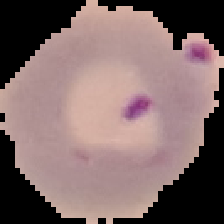

In [28]:
img

In [29]:
# this is a parasitic cell image form our test dataset

In [30]:
# We need to convert our image to an array
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [31]:
# rescaling the values 
x=x/255

In [32]:
x.shape

(224, 224, 3)

In [33]:
x1 = x.reshape(-1,224,224,3)
# We need an extra dimn because our model is expecting many values(images) with first value as the index value

In [74]:
y =model.predict(x1)


In [75]:
y
# the value of index 0 is greater, this means that the prob. of being infected is more

array([[1., 0.]], dtype=float32)

In [38]:
y.shape

(1, 2)

In [39]:
a=np.argmax(y)
# this will take the index of higher value

In [40]:
a

0

In [41]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


- Thus our model predict the image to be of infected cell, which is true

### Now we will check for an uninfected image

In [63]:
img1=image.load_img('Dataset/Test/Uninfected/20.png',target_size=(224,224))

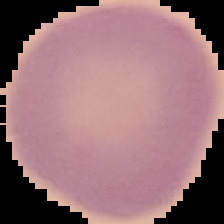

In [64]:
img1

- The above image is of an uninfected cell

In [65]:
# We need to convert our image to an array
x2=image.img_to_array(img1)
x2

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [66]:
# rescaling the values 
x2=x2/255

In [67]:
x3 = x2.reshape(-1,224,224,3)
# We need an extra dimn because our model is expecting many values(images) with first value as the index value

In [68]:
z = model.predict(x3)

In [69]:
z
# the value of index 1 is greater, this means that the prob. of being uninfected is more

array([[0.02705188, 0.97294813]], dtype=float32)

In [73]:
a = np.argmax(z)
# this will take the index of higher value

In [71]:
a

1

In [72]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
